Copyright (c) 2017-2019 [Serpent-Tools developer team](https://github.com/CORE-GATECH-GROUP/serpent-tools/graphs/contributors), GTRC

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [1]:
%matplotlib inline

# Depletion Matrix
The `serpentTools` package supports reading depletion matrix files, generated when `set depmtx 1` is added to the input file.
As of `SERPENT` 2.1.30, these files contain 
    1. The length of time for a depletion interval
    2. Vector of initial concentrations for all isotopes present in the depletion problem
    3. ZAI vector
    4. Depletion matrix
    5. Vector of final concentrations following one depletion event.
Files such as this are present for each burnable material tracked by `SERPENT` and at each time step in the problem.

This document will demonstrate the `DepmtxReader`, designed to store these arrays.


**NOTE** The depletion matrices can be very large for many problems, ~1000 x 1000 elements. For this end, the `DepmtxReader` can store the matrices in Compressed Sparse Column [`csc_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html?highlight=csc_matrix#scipy.sparse.csc_matrix) form or as full `numpy` arrays. The reader will use the sparse format if [`scipy`](https://docs.scipy.org/doc/scipy/reference/index.html) is installed unless told not to directly.

In [20]:
import serpentTools

In [3]:
reader = serpentTools.readDataFile('depmtx_ref.m')

In [4]:
reader

We have access to all the data present in the file directly on the reader.

In [5]:
reader.n0

array([1.17344222e-07, 6.10756908e-12, 7.48053806e-13, 7.52406757e-16,
       1.66113020e-34, 1.67580185e-09, 1.19223790e-36, 1.89040622e-26,
       5.09195054e-16, 7.91142112e-34, 1.68989876e-22, 6.92676695e-12,
       7.52406345e-16, 8.52076751e-13, 4.52429540e-02, 1.71307881e-12,
       1.86228871e-51, 2.32287315e-50, 1.15352152e-55, 7.72524686e-50,
       5.74084741e-44, 1.55414063e-42, 3.10757266e-40, 9.12566461e-40,
       6.82216144e-39, 9.71825616e-56, 1.59237444e-51, 1.14764875e-46,
       1.15203415e-43, 5.66072799e-41, 4.49411601e-34, 8.99210202e-31,
       8.65694179e-29, 5.96910982e-28, 1.06642058e-26, 9.10883647e-27,
       7.56006632e-36, 6.08157358e-33, 7.93562601e-40, 1.67857401e-29,
       2.76995718e-26, 2.42939173e-30, 6.93658246e-27, 3.21960435e-20,
       4.14863808e-17, 6.02145579e-16, 3.68254657e-15, 2.25927183e-15,
       2.85992932e-15, 5.34540710e-28, 2.34532631e-25, 1.36140065e-17,
       4.17935379e-16, 4.61527247e-15, 2.15346589e-15, 2.90307762e-15,
      

This input file did not include [fission yield](http://serpent.vtt.fi/mediawiki/index.php/Input_syntax_manual#set_nfylib) libraries for depletion in order to reduce the size of the depletion matrix from ~1000 x 1000 to 74 x 74. 

Number densities and quantities in the depletion matrix are stored as `longfloat` types, as they contain many signifiicant digits in the output files.

In [6]:
reader.zai

array([    -1,  10010,  10020,  10030,  20030,  20040,  30060,  30070,
        40090,  50100,  50110,  60120,  70140,  70150,  80160,  80170,
       561380, 561400, 581380, 581390, 581400, 581410, 581420, 581430,
       581440, 591410, 591420, 591430, 601420, 601430, 601440, 601450,
       601460, 601470, 601480, 601500, 611470, 611480, 611481, 611490,
       611510, 621470, 621480, 621490, 621500, 621510, 621520, 621530,
       621540, 631510, 631520, 631530, 631540, 631550, 631560, 631570,
       641520, 641530, 641540, 641550, 641560, 641570, 641580, 641600,
       922320, 922330, 922340, 922350, 922360, 922370, 922380, 922390,
       922400, 922410])

One can easily check if the depletion matrix is sparse by using the `sparse` attribute on the reader

In [7]:
reader.sparse

True

In [8]:
reader.depmtx

<74x74 sparse matrix of type '<class 'numpy.float128'>'
	with 633 stored elements in Compressed Sparse Column format>

A simple plot method can be used to plot initial concentrations, final concentrations, or both.

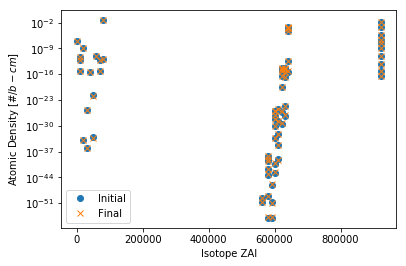

In [24]:
reader.plotDensity()

Some options can be passed to improve the look and feel of the plot

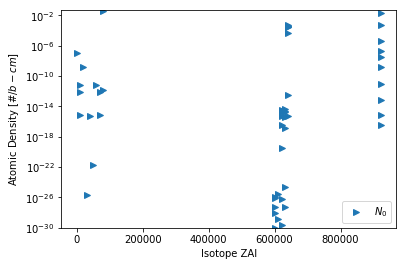

In [29]:
reader.plotDensity(
    what='n0',  # plot initial value
    markers='>',  # marker for scatter plot
    labels='$N_0$',  # labels for each entry plotted
    ylim=1E-30,  # set the lower y-axis limit
)

We can see that there is not a lot of change in the isotopic concentration in this depletion step. Furthermore, the classical fission yield curves are not present due to the lack of fission yield data. Using a more complete dataset, one can view the distribution of fission products like below.

![mtx.png](../docs/examples/images/depmtx-large.png)